In [111]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter

%matplotlib inline


conflict_df = pd.read_csv("war_data.csv")
commoditiy_df = pd.read_csv("Resources\commdataclean.csv")
war_data = pd.read_csv("war_data.csv")
war_data = war_data.rename(columns={"Years": "Start Year"})
# # Extract end year and update "Years" column (efficient)
# war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# # Optional: Remove leading "- " (if present)
# war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


# war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
# war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
# war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
# war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')
war_data

,Unnamed: 0,War,Start Year,End Year,Start Date,End Date
0,1120,Vietnam Civil War,1955,1964,1955-01-01,1964-01-01
1,1199,Vietnam War,1965,1975,1965-01-01,1975-01-01
2,1293,Vietnam vs Cambodia,1978,1978-01-1,1978-01-01,NaN
3,2282,Sino-Vietnamese,1978,1988,1978-01-01,1988-01-01
4,3332,Co1964,2016,1964-01-01,2016-01-01,NaN


In [112]:
community_df = commoditiy_df.iloc[1:]
commoditiy_df.drop(0, inplace=True)

In [113]:


# Method 1: Using a list of columns to keep
keep_cols = ['Date','Wheat, US HRW', 'Gold', 'Rice, Thai 5% ',"Tea, avg 3 auctions","Coffee, Arabica"]
df_filtered = commoditiy_df[keep_cols]  # Select only the columns you want to keep


df_filtered


,Date,"Wheat, US HRW",Gold,"Rice, Thai 5%","Tea, avg 3 auctions","Coffee, Arabica"
1,1960-01-01,59.89,35.27,104.45,1.03,0.94
2,1960-02-01,60.99,35.27,103.54,1.03,0.95
3,1960-03-01,61.73,35.27,103.79,1.03,0.93
4,1960-04-01,60.99,35.27,100.97,1.03,0.93
5,1960-05-01,57.69,35.27,102.15,1.03,0.92
...,...,...,...,...,...,...
767,2023-11-01,283.55,1984.11,598.00,2.74,4.35
768,2023-12-01,291.12,2026.18,644.00,2.71,4.65
769,2024-01-01,283.91,2034.04,660.00,2.66,4.47
770,2024-02-01,278.50,2023.24,624.00,2.71,4.60


C:\Users\austi\AppData\Local\Temp\ipykernel_23132\996268053.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
C:\Users\austi\AppData\Local\Temp\ipykernel_23132\996268053.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
C:\Users\austi\AppData\Local\Temp\ipykernel_23132\996268053.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

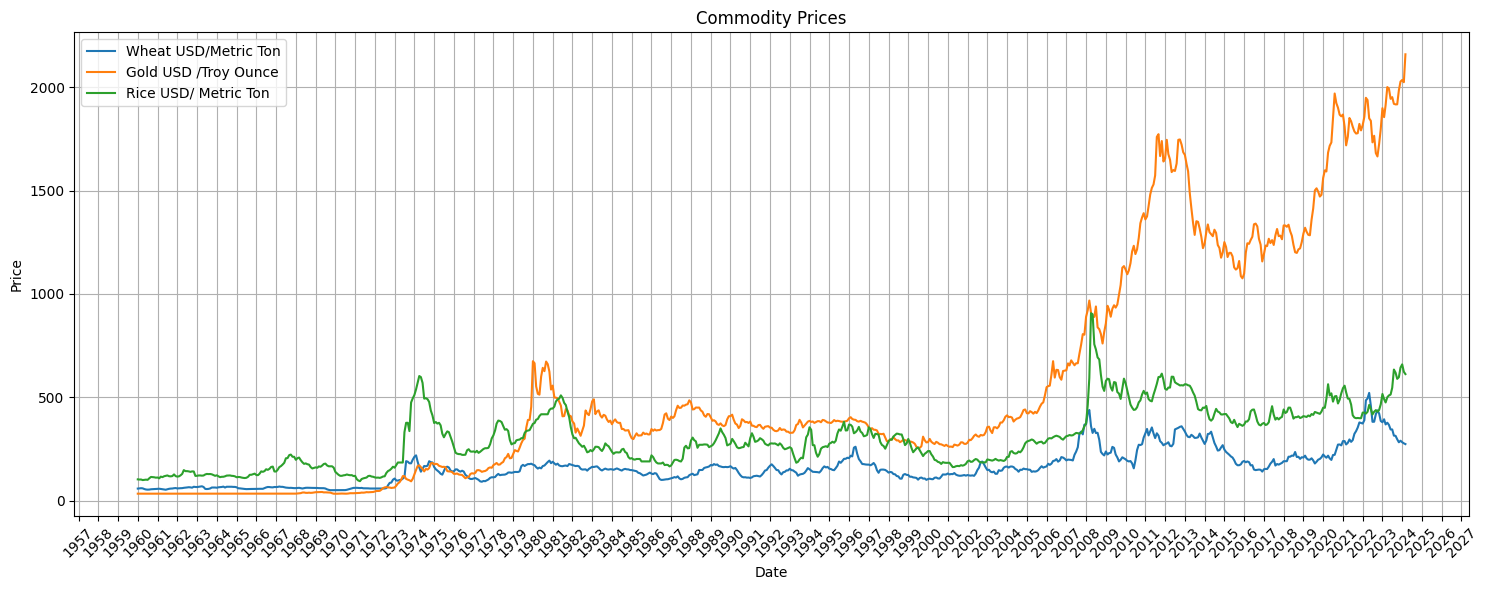

In [114]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation




df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])
df_filtered['Wheat, US HRW'] = df_filtered['Wheat, US HRW'].apply(float)
df_filtered['Gold'] = df_filtered['Gold'].apply(float)
df_filtered['Rice, Thai 5% '] = df_filtered['Rice, Thai 5% '].apply(float)

# Increase figure size
plt.figure(figsize=(15, 6))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat USD/Metric Ton', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold USD /Troy Ounce', linestyle='-')  # Store lines for later use
lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice USD/ Metric Ton', linestyle='-')  # Store lines

plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements



C:\Users\austi\AppData\Local\Temp\ipykernel_23132\3666641474.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Tea, avg 3 auctions"] = df_filtered["Tea, avg 3 auctions"].apply(float)
C:\Users\austi\AppData\Local\Temp\ipykernel_23132\3666641474.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Coffee, Arabica"] = df_filtered["Coffee, Arabica"].apply(float)


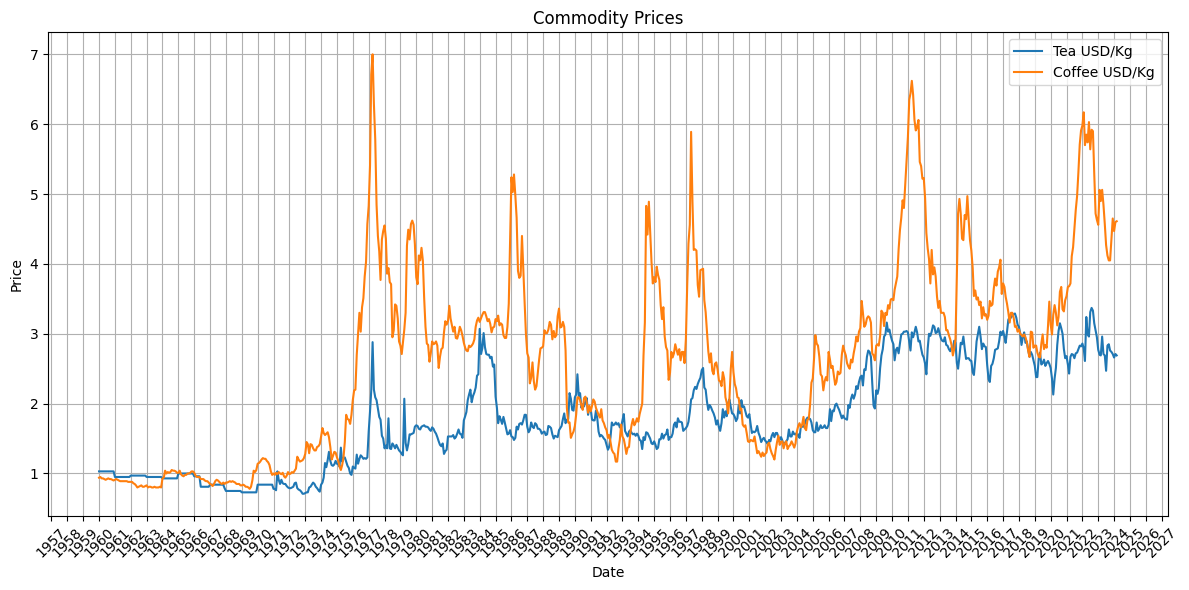

In [115]:
df_filtered["Tea, avg 3 auctions"] = df_filtered["Tea, avg 3 auctions"].apply(float)
df_filtered["Coffee, Arabica"] = df_filtered["Coffee, Arabica"].apply(float)
# Increase figure size
plt.figure(figsize=(12, 6))

# Plot with labels and title (adjust y-axis range to 2000)
lines1 = plt.plot(df_filtered['Date'], df_filtered["Tea, avg 3 auctions"], label='Tea USD/Kg', linestyle='-')  # Store lines in a variable
lines2 = plt.plot(df_filtered['Date'], df_filtered["Coffee, Arabica"], label="Coffee USD/Kg", linestyle='-')  # Store lines for later use


plt.xlabel('Date')
plt.ylabel('Price')  # Assuming the values represent price
plt.title('Commodity Prices')
plt.legend()

# Set gridlines
plt.grid(True)

# Control x-axis ticks for yearly increments
plt.gca().xaxis.set_major_locator(YearLocator())
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# Show the plot with potentially adjusted rotation for labels
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

plt.tight_layout()  # Adjust spacing to prevent overlapping elements




In [116]:
df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])

new_column_names = {
    "Wheat, US HRW": "Wheat",
    "Gold": "Gold",
    "Rice, Thai 5% ": "Rice",
    "Tea, avg 3 auctions": "Tea",
    "Coffee, Arabica": "Coffee"
}

df_filtered = df_filtered.rename(columns=new_column_names)

df_filtered

C:\Users\austi\AppData\Local\Temp\ipykernel_23132\4179650778.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Date'] = pd.to_datetime(df_filtered['Date'])


,Date,Wheat,Gold,Rice,Tea,Coffee
1,1960-01-01,59.89,35.27,104.45,1.03,0.94
2,1960-02-01,60.99,35.27,103.54,1.03,0.95
3,1960-03-01,61.73,35.27,103.79,1.03,0.93
4,1960-04-01,60.99,35.27,100.97,1.03,0.93
5,1960-05-01,57.69,35.27,102.15,1.03,0.92
...,...,...,...,...,...,...
767,2023-11-01,283.55,1984.11,598.00,2.74,4.35
768,2023-12-01,291.12,2026.18,644.00,2.71,4.65
769,2024-01-01,283.91,2034.04,660.00,2.66,4.47
770,2024-02-01,278.50,2023.24,624.00,2.71,4.60


In [118]:
# Load commodity price data (assuming 'date' is the time index and 'price' is the price column)
commodity_data = pd.read_csv("commodity_prices_clean.csv", index_col="Date", parse_dates=True)

# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data = pd.read_csv("war_data.csv")
commodity_data.index = commodity_data.index.strftime('%Y-%m-%d')
# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data):
  for _, row in conflict_data.iterrows():
    if (date >= row["Start Date"]) & (date <= row["End Date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data["conflict"] = commodity_data.index.map(lambda x: create_conflict_indicator(x, conflict_data))
commodity_data

,Wheat,Gold,Rice,Tea,Coffee,conflict
Date,,,,,,
1960-01-01,59.89,35.27,104.45,1.03,0.94,1
1960-02-01,60.99,35.27,103.54,1.03,0.95,1
1960-03-01,61.73,35.27,103.79,1.03,0.93,1
1960-04-01,60.99,35.27,100.97,1.03,0.93,1
1960-05-01,57.69,35.27,102.15,1.03,0.92,1
...,...,...,...,...,...,...
2023-11-01,283.55,1984.11,598.00,2.74,4.35,1
2023-12-01,291.12,2026.18,644.00,2.71,4.65,1
2024-01-01,283.91,2034.04,660.00,2.66,4.47,1


In [120]:
# Calculate Pearson correlation coefficient of Gold
correlation_gold, p_value_gold = pearsonr(commodity_data["Gold"], commodity_data["conflict"])
print(f"Gold Correlation Coefficient: {correlation_gold:.4f}")
print(f"Gold p-value: {p_value_gold:.4f}")

# Calculate Pearson correlation coefficient of Wheat
correlation_wheat, p_value_wheat = pearsonr(commodity_data["Wheat"], commodity_data["conflict"])
print(f"Wheat Correlation Coefficient: {correlation_wheat:.4f}")
print(f"Wheat p-value: {p_value_wheat:.4f}")

# Calculate Pearson correlation coefficient of Rice
correlation_Rice, p_value_Rice = pearsonr(commodity_data["Rice"], commodity_data["conflict"])
print(f"Rice Correlation Coefficient: {correlation_Rice:.4f}")
print(f"Rice p-value: {p_value_Rice:.4f}")




Gold Correlation Coefficient: 0.2480
Gold p-value: 0.0000
Wheat Correlation Coefficient: 0.1697
Wheat p-value: 0.0000
Rice Correlation Coefficient: 0.1047
Rice p-value: 0.0036


In [ ]:

# # Convert numeric columns to float (assuming they contain numbers)
# # This can be done in a vectorized way using apply
# numeric_cols = ['Wheat', 'Gold', 'Rice', "Tea", "Coffee"]

# df_filtered[numeric_cols] = df_filtered[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Handle non-numeric values with 'coerce'
# commodity_pct_change = df_filtered.iloc[:, 1:].pct_change()

# #commodity_pct_change_clean.drop(commodity_pct_change_clean.columns[0], axis=1, inplace=True)
# commodity_pct_change

In [ ]:
##Percent change code####

# # Get a single column representing percentage change (you can choose a specific column)
# pct_change = commodity_pct_change.iloc[:, 0]  # Assuming the first column has pct_change

# # Configure the plot
# plt.figure(figsize=(10, 6))  # Set the figure size (optional)
# plt.plot(pct_change)  # Plot the percentage change data
# plt.xlabel('Date')  # Set the x-axis label
# plt.ylabel('Percentage Change (%)')  # Set the y-axis label
# plt.title('Percentage Change Over Time of Gold')  # Set the plot title (optional)
# plt.grid(True)  # Add gridlines for better readability (optional)

# # Rotate x-axis labels if needed for long dates
# plt.xticks(rotation=45)  # Rotate x-axis labels by 45 degrees (optional)

# # Show the plot
# plt.tight_layout()  # Adjust spacing between elements (optional)
# plt.show()

In [ ]:


# # Read the data from the CSV file
# data = pd.read_csv("Resources\clean_war_data.csv")

# # Select rows where column 1 values are in the list
# filtered_data = data[data.iloc[:, 0].isin([99, 15, 11, 106, 70, 56, 45, 12, 0])]

# # Save the filtered data to a new CSV file (optional)
# filtered_data.to_csv("filtered_war_data.csv", index=False)

# print("Filtering complete! Check 'filtered_war_data.csv' for the results.")


In [ ]:
# commodity_prices = df_filtered.set_index('Date')
# commodity_prices.to_csv('commodity_prices_date_index.csv')





In [ ]:

# new_names = {'Wheat, US HRW': 'Wheat', 'Rice, Thai 5% ': 'Rice', 'Tea, avg 3 auctions': 'Tea', 'Coffee, Arabica':'Coffee'}
# commodity_prices = df_filtered.set_index('Date')
# commodity_prices = commodity_prices.rename(columns=new_names)

# commodity_prices.to_csv('commodity_prices_clean.csv')

In [ ]:
import matplotlib.ticker as ticker  # Import the ticker module
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter
import numpy as np  # Needed for heatmap
from datetime import datetime  # Assuming Start Date is datetime format
import pandas as pd  # Needed for data manipulation
from scipy.stats import pearsonr

# Load commodity price data (assuming 'date' is the time index and 'price' is the price column)
commodity_data = pd.read_csv("commodity_prices_clean.csv", index_col="Date", usecols=['Coffee', 'Date'], parse_dates=True)

# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data = pd.read_csv("war_data_Tea.csv")
commodity_data.index = commodity_data.index.strftime('%Y-%m-%d')
# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data):
  for _, row in conflict_data.iterrows():
    if (date >= row["Start Date"]) & (date <= row["End Date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data["conflict"] = commodity_data.index.map(lambda x: create_conflict_indicator(x, conflict_data))
commodity_data




# Calculate Pearson correlation coefficient of Gold
correlation_Tea, p_value_Tea = pearsonr(commodity_data["Coffee"], commodity_data["conflict"])
print(f"Coffee Correlation Coefficient: {correlation_Tea:.4f}")
print(f"Coffee p-value: {p_value_Tea:.4f}")




Coffee Correlation Coefficient: -0.4095
Coffee p-value: 0.0000


In [ ]:
commodity_data = pd.read_csv("commodity_prices_clean.csv", index_col="Date", usecols=['Tea', 'Date'], parse_dates=True)

# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data = pd.read_csv("war_data_coffee.csv")
commodity_data.index = commodity_data.index.strftime('%Y-%m-%d')
# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data):
  for _, row in conflict_data.iterrows():
    if (date >= row["Start Date"]) & (date <= row["End Date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data["conflict"] = commodity_data.index.map(lambda x: create_conflict_indicator(x, conflict_data))
commodity_data




# Calculate Pearson correlation coefficient of Gold
correlation_coffee, p_value_Tea = pearsonr(commodity_data["Coffee"], commodity_data["conflict"])
print(f"Tea Correlation Coefficient: {correlation_coffee:.4f}")
print(f"Tea p-value: {p_value_coffee:.4f}")

TypeError: '<=' not supported between instances of 'str' and 'float'

In [ ]:
import matplotlib.ticker as ticker  # Import the ticker module


# Calculate Pearson correlation coefficient of Gold
correlation_gold, p_value_gold = pearsonr(commodity_data["Gold"], commodity_data["conflict"])
print(f"Gold Correlation Coefficient: {correlation_gold:.4f}")
print(f"Gold p-value: {p_value_gold:.4f}")

# Calculate Pearson correlation coefficient of Wheat
correlation_wheat, p_value_wheat = pearsonr(commodity_data["Wheat"], commodity_data["conflict"])
print(f"Wheat Correlation Coefficient: {correlation_wheat:.4f}")
print(f"Wheat p-value: {p_value_wheat:.4f}")

# Calculate Pearson correlation coefficient of Rice
correlation_Rice, p_value_Rice = pearsonr(commodity_data["Rice"], commodity_data["conflict"])
print(f"RiceCorrelation Coefficient: {correlation_Rice:.4f}")
print(f"Rice p-value: {p_value_Rice:.4f}")


Gold Correlation Coefficient: 0.2480
Gold p-value: 0.0000
Wheat Correlation Coefficient: 0.1697
Wheat p-value: 0.0000
RiceCorrelation Coefficient: 0.1047
Rice p-value: 0.0036


In [ ]:
import pandas as pd
commodity_data_cafe
conflict_data_coffee = pd.read_csv("war_data_coffee.csv")
import pandas as pd

# Assuming your DataFrame is named 'conflict_data_coffee'
try:
  # Attempt conversion with potential format '%Y-%m-%d'
  conflict_data_coffee['Start Date'] = pd.to_datetime(conflict_data_coffee['Start Date'], format='%Y-%m-%d')
  conflict_data_coffee['End Date'] = pd.to_datetime(conflict_data_coffee['End Date'], format='%Y-%m-%d')

except ValueError:  # Handle potential format errors gracefully
  print("Error: Invalid date format in 'Start Date' or 'End Date' columns. Please check data.")
  # Optional: Raise a specific exception or provide instructions for manual correction

# Print the DataFrame to verify the conversion
conflict_data_coffee.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  5 non-null      int64         
 1   War         5 non-null      object        
 2   Start Year  5 non-null      int64         
 3   End Year    5 non-null      object        
 4   Start Date  5 non-null      datetime64[ns]
 5   End Date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(2)
memory usage: 368.0+ bytes


In [ ]:
# Load commodity price data (assuming 'date' is the time index and 'price' is the price column)

commodity_data_cafe = pd.read_csv("commodity_prices_clean.csv",usecols=["Date", "Coffee"], index_col="Date", parse_dates=True)
# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data_coffee = pd.read_csv('war_data_coffee.csv')


def create_conflict_indicator(date, conflict_data):
  """
  Checks if a given date falls within any conflict period in the provided DataFrame.

  Args:
      date (datetime): The date to check for conflicts.
      conflict_data (pandas.DataFrame): A DataFrame with columns 'Start Date' (datetime)
          and 'End Date' (datetime) representing conflict periods.

  Returns:
      bool: True if the date falls within any conflict period, False otherwise.
  """

  # Ensure consistent datetime format
  conflict_data['Start Date'] = pd.to_datetime(conflict_data['Start Date'], format='%Y-%m-%d')
  conflict_data['End Date'] = pd.to_datetime(conflict_data['End Date'], format='%Y-%m-%d')

  # Efficient vectorized comparison
  return (conflict_data['Start Date'] <= date) & (conflict_data['End Date'] >= date).any()

# Load your CSV data (assuming 'your_data.csv' is the filename)


# Add 'conflict' column with conflict indicator
commodity_data_cafe["conflict"] = commodity_data_cafe.index.map(lambda x: create_conflict_indicator(x, conflict_data_coffee.copy()))
commodity_data_cafe


,Coffee,conflict
Date,,
1960-01-01,0.94,0 True 1 False 2 False 3 False 4 ...
1960-02-01,0.95,0 True 1 False 2 False 3 False 4 ...
1960-03-01,0.93,0 True 1 False 2 False 3 False 4 ...
1960-04-01,0.93,0 True 1 False 2 False 3 False 4 ...
1960-05-01,0.92,0 True 1 False 2 False 3 False 4 ...
...,...,...
2023-11-01,4.35,0 False 1 False 2 False 3 False 4 ...
2023-12-01,4.65,0 False 1 False 2 False 3 False 4 ...
2024-01-01,4.47,0 False 1 False 2 False 3 False 4 ...


In [ ]:
import pandas as pd

# Load commodity price data
commodity_data_cafe = pd.read_csv(
    "commodity_prices_clean.csv", usecols=["Date", "Coffee"], index_col="Date", parse_dates=True
)

# Load conflict data
conflict_data_coffee = pd.read_csv('war_data_coffee.csv')


def create_conflict_indicator(date, conflict_data):
    """
    Checks if a given date falls within any conflict period in the provided DataFrame.

    Args:
        date (datetime): The date to check for conflicts.
        conflict_data (pandas.DataFrame): A DataFrame with columns 'Start Date' (datetime)
            and 'End Date' (datetime) representing conflict periods.

    Returns:
        bool: True if the date falls within any conflict period, False otherwise.
    """

    # Ensure consistent datetime format
    conflict_data['Start Date'] = pd.to_datetime(conflict_data['Start Date'], format='%Y-%m-%d')
    conflict_data['End Date'] = pd.to_datetime(conflict_data['End Date'], format='%Y-%m-%d')

    # Efficient vectorized comparison
    return (conflict_data['Start Date'] <= date) & (conflict_data['End Date'] >= date).any()


# Add 'conflict' column with conflict indicator (0 or 1)
commodity_data_cafe["conflict"] = commodity_data_cafe.index.map(lambda x: create_conflict_indicator(x, conflict_data_coffee.copy())).astype(int)

print(commodity_data_cafe)  # This will now show 0 or 1 in the 'conflict' column


ValueError: setting an array element with a sequence.

In [ ]:


commodity_data_coffee = pd.read_csv("commodity_prices_clean.csv", index_col="Date", parse_dates=True)
commodity_data_coffee


,Wheat,Gold,Rice,Tea,Coffee
Date,,,,,
1960-01-01,59.89,35.27,104.45,1.03,0.94
1960-02-01,60.99,35.27,103.54,1.03,0.95
1960-03-01,61.73,35.27,103.79,1.03,0.93
1960-04-01,60.99,35.27,100.97,1.03,0.93
1960-05-01,57.69,35.27,102.15,1.03,0.92
...,...,...,...,...,...
2023-11-01,283.55,1984.11,598.00,2.74,4.35
2023-12-01,291.12,2026.18,644.00,2.71,4.65
2024-01-01,283.91,2034.04,660.00,2.66,4.47


In [ ]:


# Load conflict data (assuming 'start_date' and 'end_date' define conflict periods)
conflict_data_coffee = pd.read_csv("war_data_coffee.csv")
commodity_data_cafe = pd.read_csv('commodity_prices_date_index.csv')

# Function to create conflict indicator variable
def create_conflict_indicator(date, conflict_data_coffee):
  for _, row in conflict_data_coffee.iterrows():
    if (date >= row["Start Date"]) & (date <= row["End Date"]):
      return 1
  return 0

# Apply function to create conflict indicator as a new column in commodity data
commodity_data_cafe["conflict"] = commodity_data_cafe.index.map(lambda x: create_conflict_indicator(x, conflict_data_coffee))
commodity_data_cafe

TypeError: '>=' not supported between instances of 'int' and 'str'

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import YearLocator, DateFormatter
# import numpy as np  # Needed for heatmap
# from datetime import datetime  # Assuming Start Date is datetime format
# import pandas as pd  # Needed for data manipulation

# # Increase figure size
# plt.figure(figsize=(6, 12))

# # Plot with labels and title (adjust y-axis range to 2000)
# lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
# lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
# lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

# plt.xlabel('Date')
# plt.ylabel('Price')  # Assuming the values represent price
# plt.title('Commodity Prices')
# plt.legend()

# # Set gridlines
# plt.grid(True)

# # Control x-axis ticks for yearly increments
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# # Show the plot with potentially adjusted rotation for labels
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

# plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# # Now set the y-axis limits after creating the lines
# plt.ylim(0, 2000)  # Set y-axis range to (2000)

# # Ensure Start Date and End Date are datetime format (if necessary)
# if not pd.api.types.is_datetime64_dtype(war_data["Start Date"]):
#     try:
#         # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#         war_data["Start Date"] = pd.to_datetime(war_data["Start Date"], format='%Y-%m-%d')  # Adjust format if needed
#     except ValueError:
#         print("Error: Inconsistent date format in 'Start Date'. Please check and adjust the format string in pd.to_datetime().")
#         # Handle the case where conversion fails due to inconsistent formatting

# if not pd.api.types.is_datetime64_dtype(war_data["End Date"]):
#     try:
#         # Attempt conversion assuming consistent format (e.g., YYYY-MM-DD)
#         war_data["End Date"] = pd.to_datetime(war_data["End Date"], format='%Y-%m-%d')  # Adjust format if needed
#     except ValueError:
#         print("Error: Inconsistent date format in 'End Date'. Please check and adjust the format string in pd.to_datetime().")
#         # Handle the case where conversion fails due to inconsistent formatting

# # Calculate year ranges for heatmap
# years = war_data["Start Date"].dt.year  # Extract years from Start Date (assuming conversion successful)

# # Create a binary array indicating conflict presence (1) or absence (0) for each year
# conflict_presence = np.zeros(len(years))  # Initialize with zeros (no conflict)
# for index, row in war_data.iterrows():
#     start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
#     end_year = row["End Date"].dt.year.item()  # Extract year from datetime
#     for year in range(start_year, end_year + 1):
#         conflict_presence[year - years[0]] = 1  # Mark years with conflict (1)

# # Calculate conflict years
# conflict_years = []
# for index, row in war_data.iterrows():
#     start_year = row["Start Date"].dt.year.item()  # Extract year from datetime
#     end_year = row["End Date"].dt.year.item()  # Extract year from datetime
#     for year in range(start_year, end_year + 1):
#         conflict_years.append(year)

# # Plot points for conflict years (consider marker and color customization)
# plt.scatter(conflict_years, np.zeros(len(conflict_years)), marker='o', color='red', s=50, label='Conflict Year')  # Adjust marker, color, and size

# # Heatmap plot (adjust extent for point visibility if needed)
# extent = (min(years), max(years), 0, 1.1)  # Adjust extent for year range and binary values
# cmap = plt.cm.binary  # Choose a colormap for conflict presence (e.g., black for conflict, white for no conflict)
# plt.imshow(conflict_presence.reshape(-1, 1), extent=extent, cmap=cmap, alpha=0.7)

# # Inverted x-axis for heatmap (optional)

# plt.colorbar(label="Conflict Presence (1 = Conflict)")  # Add colorbar with label
# # plt.gca().invert_xaxis()
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib.dates import YearLocator, DateFormatter
# import numpy as np  # Needed for heatmap
# from datetime import datetime  # Assuming Start Date is datetime format

# # Increase figure size
# plt.figure(figsize=(20, 12))  # Swap width and height for vertical orientation

# # Plot with labels and title
# lines1 = plt.plot(df_filtered['Date'], df_filtered['Wheat, US HRW'], label='Wheat', linestyle='-')  # Store lines in a variable
# lines2 = plt.plot(df_filtered['Date'], df_filtered['Gold'], label='Gold', linestyle='-')  # Store lines for later use
# lines3 = plt.plot(df_filtered['Date'], df_filtered['Rice, Thai 5% '], label='Rice, Thai 5% ', linestyle='-')  # Store lines

# plt.xlabel('Date')
# plt.ylabel('Price')  # Assuming the values represent price
# plt.title('Commodity Prices')
# plt.legend()

# # Set gridlines
# plt.grid(True)

# # Control x-axis ticks for yearly increments
# plt.gca().xaxis.set_major_locator(YearLocator())
# plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))  # Format as year only

# # Show the plot with potentially adjusted rotation for labels
# plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability with more data

# plt.tight_layout()  # Adjust spacing to prevent overlapping elements

# # Now set the y-axis limits after creating the lines
# plt.ylim(0, 2000)  # Set y-axis range to (0, 2000)

# # Calculate year ranges for heatmap (assuming Start Date and End Date represent years)
# years = war_data["Start Date"].dt.year  # Extract years from Start Date
# durations = (war_data["End Date"].dt.year - years)  # Calculate durations (End Year - Start Year)

# # Create a colormap for the heatmap
# cmap = plt.cm.YlOrRd  # Choose a colormap (e.g., YlOrRd represents yellow to red)

# # Create a 2D array for the heatmap data (transpose for vertical orientation)
# heatmap_data = np.zeros((len(durations), 1))  # One column for durations
# heatmap_data[:, 0] = durations.values  # Assign durations to the heatmap data
# heatmap_data = heatmap_data.T  # Transpose the data for vertical heatmap

# # Plot the heatmap (using y-axis for durations)
# extent = (min(date2num(war_data["Start Date"])), max(date2num(war_data["End Date"])), 0, max(durations) + 2000)  # Adjust extent as needed
# plt.imshow(heatmap_data, extent=extent, cmap=cmap, alpha=0.4, aspect='auto')

# # Inverted x-axis for heatmap (optional)
# # plt.gca().invert_xaxis()  # Invert x-axis to align with price x-axis (optional)

# plt.colorbar(label="War Duration (Years)")  # Add colorbar with label

# plt.show()

In [ ]:
# war_data = pd.read_csv("Resources\warlist.csv")
# war_data = war_data.rename(columns={"Years": "Start Year"})
# # Extract end year and update "Years" column (efficient)
# war_data["Start Year"], war_data["End Year"] = zip(*war_data["Start Year"].str.split(" - "))

# # Optional: Remove leading "- " (if present)
# war_data["End Year"] = war_data["End Year"].str.lstrip("- ")


# war_data["Start Year"] = war_data["Start Year"].astype(str)  # Ensure it's a string
# war_data["Start Date"] = pd.to_datetime(war_data["Start Year"], format='%Y')
# war_data["End Year"] = war_data["End Year"].astype(str)  # Ensure it's a string
# war_data["End Date"] = pd.to_datetime(war_data["End Year"], format='%Y')

: 